In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, math, os
import operator

In [174]:
TOPIC_MODELLING_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Topic_Modelling/'
THRESHOLD_PROBABILITY = 0.10

SAVE = True
SAVE_FOLDER = 'TACT/img/topics/'
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [166]:
def getPlottableDataFrame(predictions):
    topic_counts = [0] * 15

    for pred in predictions:
        l = eval(pred)
        for topic_prob in l:
            if topic_prob[1] > THRESHOLD_PROBABILITY:
                topic_counts[topic_prob[0]] += 1
                
    to_plot = pd.DataFrame(topic_counts).reset_index().rename({'index' : 'x', 0 : 'y'}, axis=1)
    
    return to_plot

In [167]:
def plotAgainstTopics(x,y):
    sns.set_context('talk')
    sns.set(rc={'figure.figsize':(12,8)})

    fig,ax = plt.subplots(1,1)
    plt.scatter(x, y, s=100)
    ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
    plt.xlabel('Topics', fontsize=20)
    plt.ylabel('Number of comments', fontsize=20)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.tight_layout()

    return fig

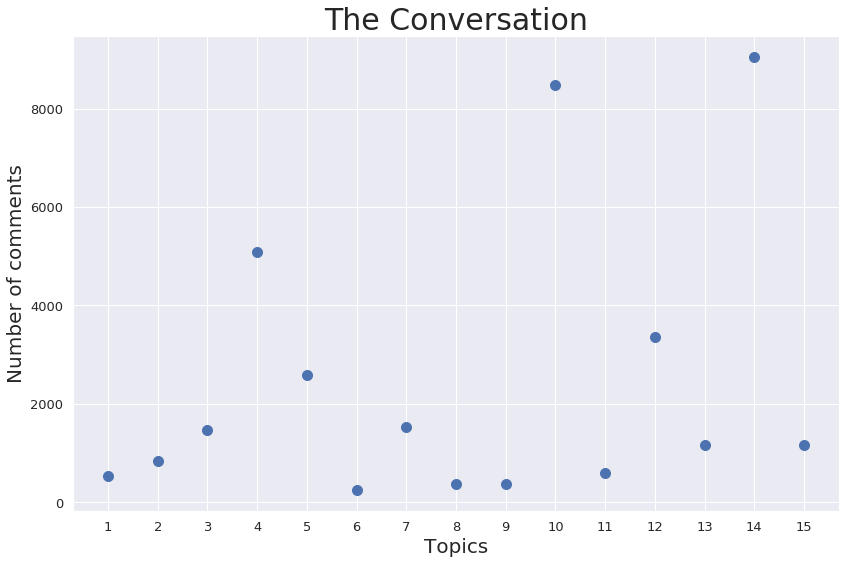

In [175]:
all_preds = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/conv_comments_topics.txt', sep=';', header=None, index_col=0)[1])
to_plot = getPlottableDataFrame(all_preds)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])
plt.title('The Conversation', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Conversation.png')
else:
    plt.show()

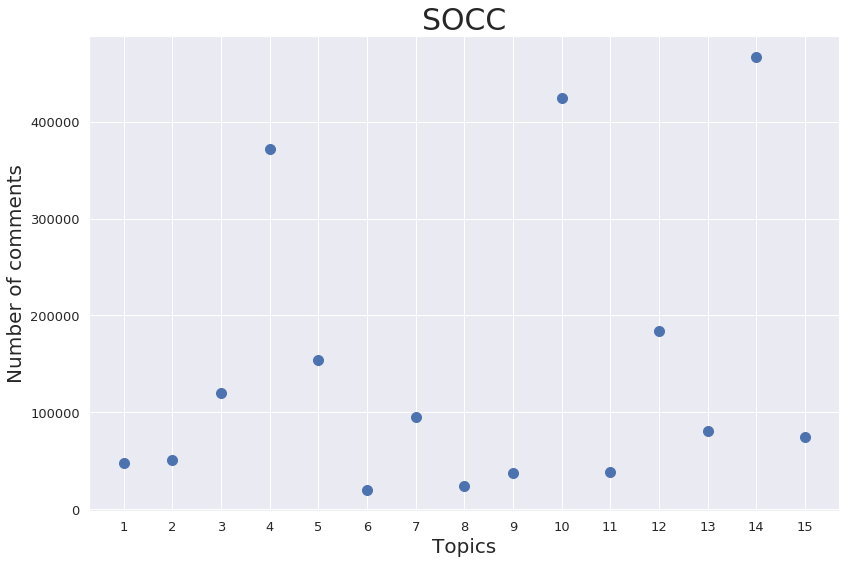

In [176]:
all_preds = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_comments_topics.txt', sep=';', header=None, index_col=0)[1])
to_plot = getPlottableDataFrame(all_preds)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])
plt.title('SOCC', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/SOCC.png')
else:
    plt.show()

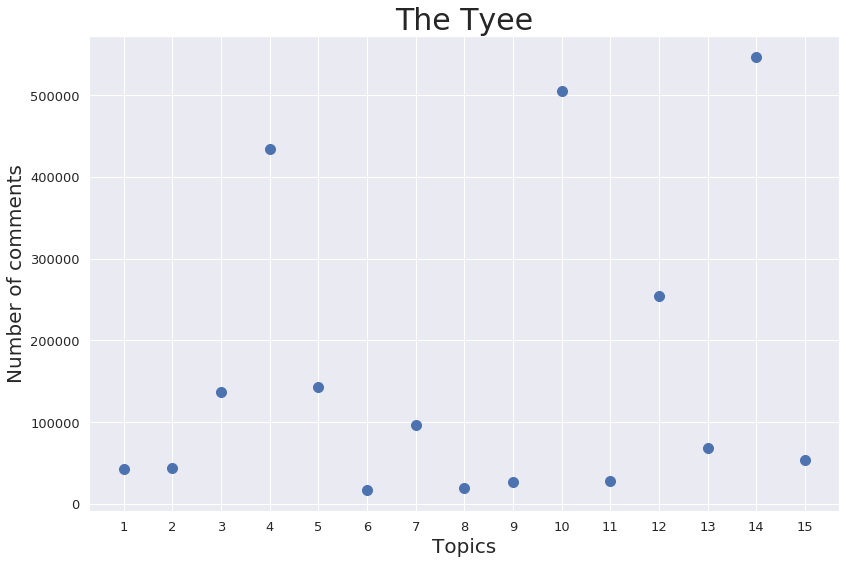

In [177]:
all_preds = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/tyee_comments_topics.txt', sep=';', header=None, index_col=0)[1])
to_plot = getPlottableDataFrame(all_preds)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])
plt.title('The Tyee', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Tyee.png')
else:
    plt.show()

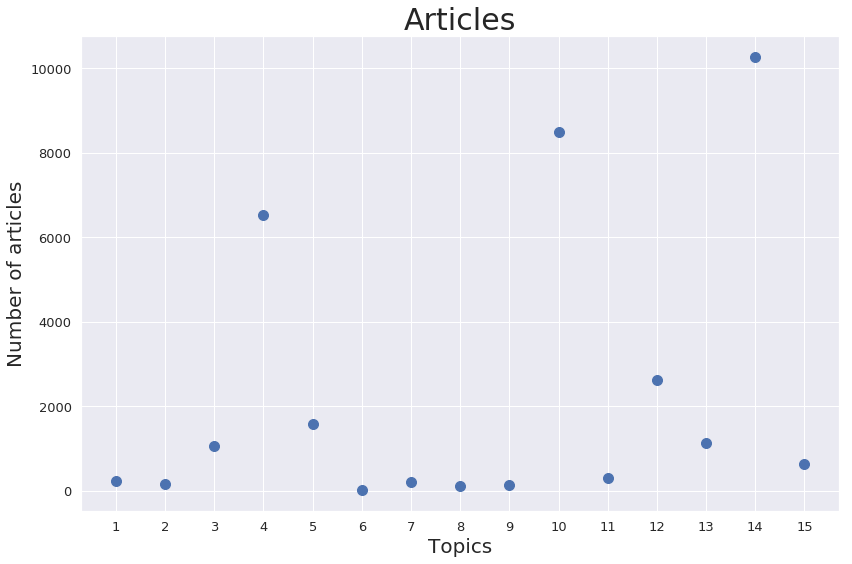

In [180]:
all_preds = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_articles_topics.txt', sep=';', header=None, index_col=0)[1])
to_plot = getPlottableDataFrame(all_preds)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])
plt.title('Articles', fontsize=30)
plt.ylabel('Number of articles', fontsize=20)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/Articles.png')
else:
    plt.show()

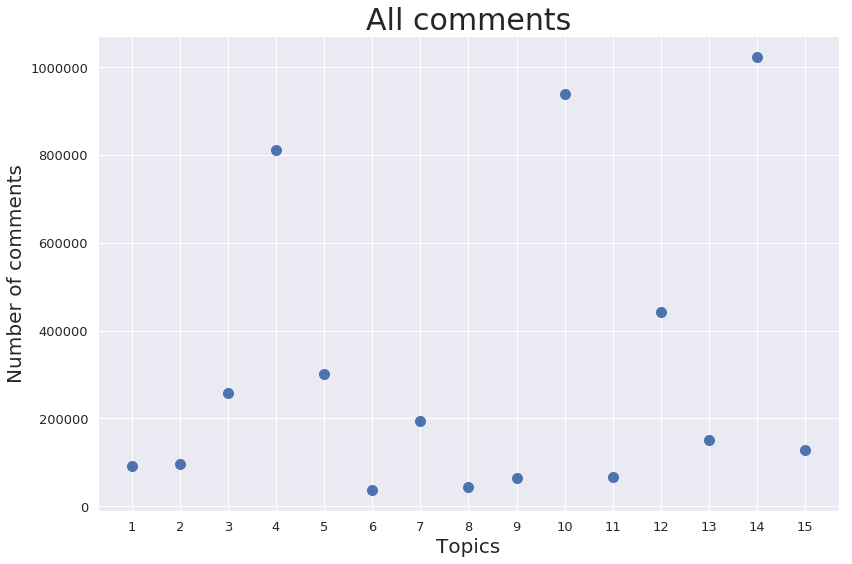

In [212]:
all_preds = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_comments_topics.txt', sep=';', header=None, index_col=0)[1])
all_preds += list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/conv_comments_topics.txt', sep=';', header=None, index_col=0)[1])
all_preds += list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/tyee_comments_topics.txt', sep=';', header=None, index_col=0)[1])

to_plot = getPlottableDataFrame(all_preds)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])
plt.title('All comments', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/All_comments.png')
else:
    plt.show()

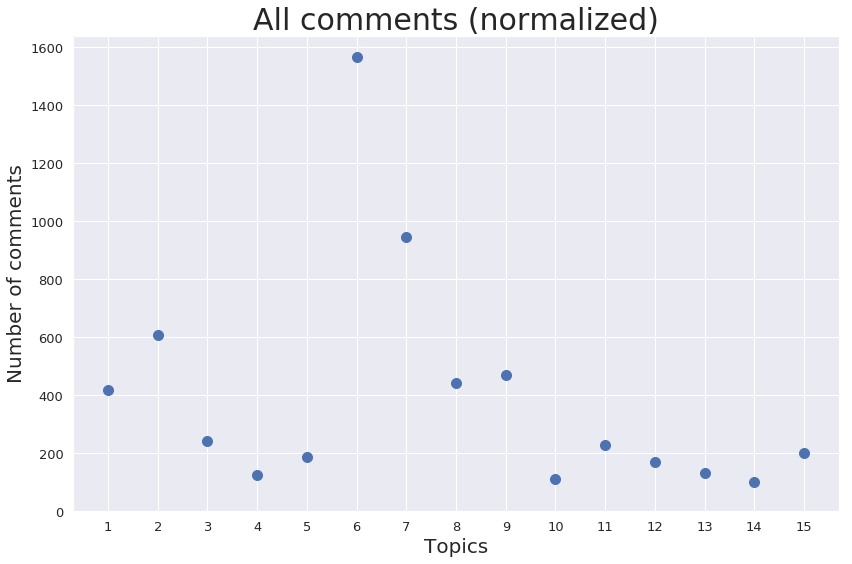

In [213]:
all_comments = to_plot

articles_list = list(pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_articles_topics.txt', sep=';', header=None, index_col=0)[1])
all_articles = getPlottableDataFrame(articles_list)

merged = all_comments.merge(all_articles, on='x', suffixes=['_comments', '_articles'])
merged['y'] = merged['y_comments'] / merged['y_articles']

fig = plotAgainstTopics(merged['x'], merged['y'])
plt.title('All comments (normalized)', fontsize=30)
plt.ylim([0,None])
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/All_comments_normalized.png')
else:
    plt.show()